# Data Loading_파일 불러오기

In [21]:
# import module

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [22]:
# read file

file_path = '../data/diabetes.csv'

data = pd.read_csv(file_path)
df = pd.DataFrame(data)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Loading_그래프로 확인

In [23]:
#import module

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Diabetes or not')

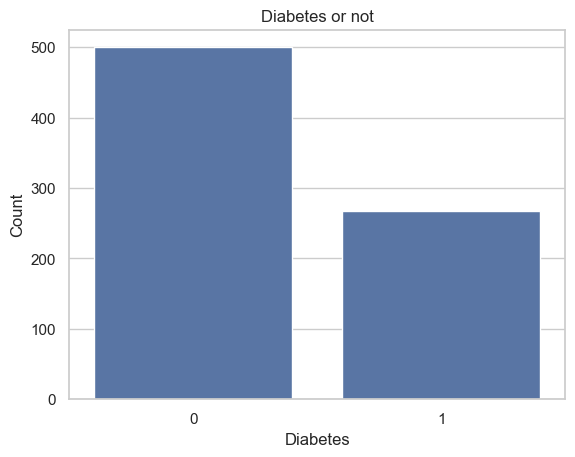

In [24]:
# Check class imbalance with graph

sns.countplot(data = df, x = "Outcome")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Diabetes or not")

# Data Cleaning_결측치 제거

In [25]:
# null값이 있는지 확인

df.isnull().sum()

# null값이 있을 경우 dropna()함수로 행 제거할 수 있음
# df = df.dropna()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Cleaning_Scatter_나이에 따라

Text(0.5, 1.0, 'Diabetes by age')

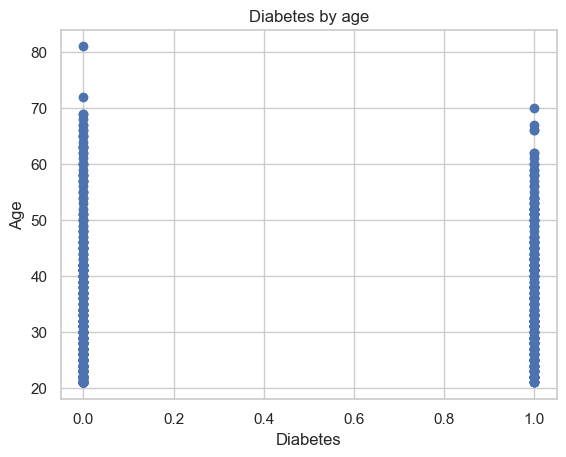

In [26]:
# DataFrame 생성 후 plt로 scatter 그려 outlier 확인

plt.scatter(df['Outcome'], df['Age'])
plt.xlabel("Diabetes")
plt.ylabel("Age")
plt.title("Diabetes by age")

# Data Cleaning_Boxplot_나이에 따라

C:\Users\황주신\AppData\Local\Temp\ipykernel_14728\183523303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Age", data = df, palette = "Set3")


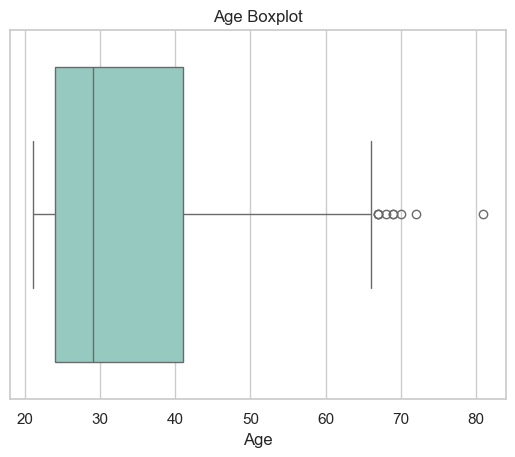

In [27]:
# sns로 boxplot 그려 outlier 확인

sns.set_theme(style = "whitegrid")
sns.boxplot(x = "Age", data = df, palette = "Set3")
plt.title("Age Boxplot")
plt.show()

# Data Cleaning_Outlier 제거

In [28]:
# 70세 이상인 경우 제거

df = df.drop(df[df['Age'] > 70].index)

Text(0.5, 1.0, 'Diabetes by age')

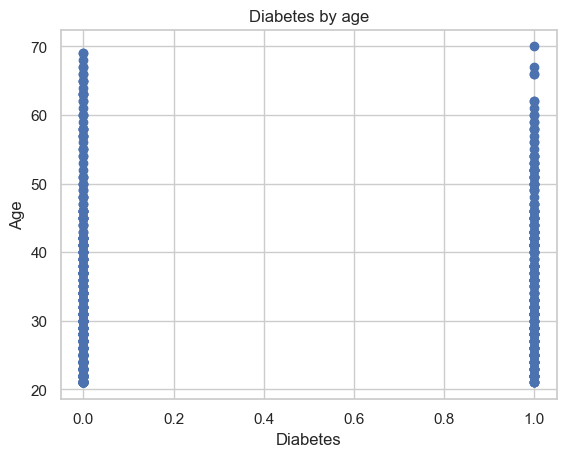

In [29]:
# plt.scatter로 잘 제거되었는지 확인

plt.scatter(df['Outcome'], df['Age'])
plt.xlabel("Diabetes")
plt.ylabel("Age")
plt.title("Diabetes by age")

C:\Users\황주신\AppData\Local\Temp\ipykernel_14728\268850503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Age", data = df, palette = "Set3")


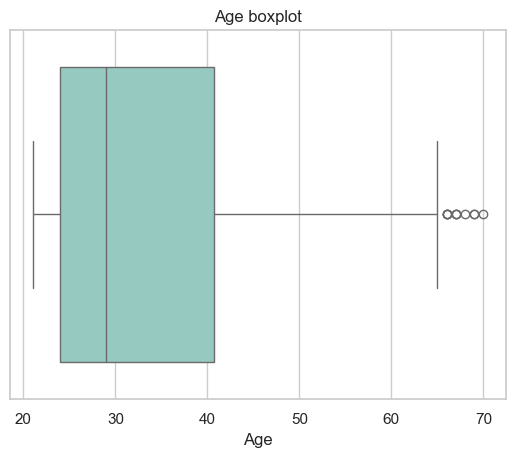

In [30]:
# sns.boxplot으로 잘 제거되었는지 확인

sns.set_theme(style = "whitegrid")
sns.boxplot(x = "Age", data = df, palette = "Set3")
plt.title("Age boxplot")
plt.show()

# feature와 label 나누기

In [31]:
# Feature는 X에, Label은 Y에 저장

X = df.drop('Outcome', axis = 1)
Y = df['Outcome']


Outcome
0    498
1    268
Name: count, dtype: int64


In [32]:
# X에 Outcome 열 빠졌는지 확인

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
# Outcome Imbalance여부 확인

Y.value_counts()

Outcome
0    498
1    268
Name: count, dtype: int64

# Train 데이터와 Test 데이터 나누기

In [36]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Data Scaling

In [37]:
# module import

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
# MinMaxScaler()를 사용한 data scaling
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train.index,
                                 columns = X_train.columns) 
X_train_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
481,0.000000,0.618090,0.721311,0.587302,0.000000,0.524590,0.050811,0.163265
118,0.235294,0.487437,0.491803,0.365079,0.000000,0.420268,0.155850,0.020408
247,0.000000,0.829146,0.737705,0.523810,0.803783,0.779434,0.149018,0.040816
157,0.058824,0.547739,0.459016,0.333333,0.159574,0.375559,0.322374,0.040816
469,0.352941,0.773869,0.639344,0.650794,0.165485,0.687034,0.210504,0.122449


In [39]:
#StandardScaler()를 사용한 data scaling
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train.index,
                                 columns = X_train.columns) 
X_train_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
481,-1.119774,0.079576,0.971469,1.047430,-0.689700,0.387571,-0.815165,-0.374705
118,0.043233,-0.739447,-0.501595,0.158613,-0.689700,-0.492740,-0.089220,-0.969676
247,-1.119774,1.402612,1.076688,0.793482,5.307240,2.538045,-0.136435,-0.884680
157,-0.829023,-0.361436,-0.712032,0.031640,0.500869,-0.870016,1.061670,-0.884680
469,0.624736,1.056102,0.445375,1.301377,0.544964,1.758341,0.288508,-0.544697


# 모델 학습시키고 평가하기

In [41]:
# make model

diabetes_lg = LogisticRegression(random_state=0)
diabetes_lg_scaled = LogisticRegression(random_state = 0)

In [42]:
# fit model

diabetes_lg.fit(X_train, Y_train)
diabetes_lg_scaled.fit(X_train_scaled_df, Y_train) # 분류에는 StandardScaler로 scaling한게 적합


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [43]:
# test model (Not scaled)

pred_diabetes = diabetes_lg.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_diabetes))
print (confusion_matrix(Y_test, pred_diabetes))


--- Logistic Regression Classifier ---
0.7922077922077922
[[89 10]
 [22 33]]


In [44]:
# test model

pred_diabetes = diabetes_lg_scaled.predict(X_test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_diabetes))
print (confusion_matrix(Y_test, pred_diabetes))


--- Logistic Regression Classifier ---
0.8181818181818182
[[90  9]
 [19 36]]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 결론
# - Data Scaling을 통해 예측 성공률이 높아졌다.
# - MinMaxScaler의 경우 0과 1 사이의 값이, StandardScaler의 경우 정규분포를 가진 값으로 스케일링되었다. 